Статистика, исследование.

Дан кейс по играм. Необходимо ответить на след. вопросы:

Как критики относятся к спортивным играм?
Критикам нравятся больше игры на PC или на PS4?
Критикам больше нравятся стрелялки или стратегии?

Для каждого вопроса:
- сформировать нулевую и альтернативную гипотезы
- выбрать пороговый уровень статистической значимости
- сделать выводы



In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
df=pd.read_csv('vgsales.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Как критики относятся к спортивным играм?

In [ ]:
df_sports = df[df['Genre']=='Sports']
df_sports.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E
77,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.12,6.12,0.06,1.28,8.57,82.0,42.0,4.3,896.0,EA Sports,E


<Axes: >

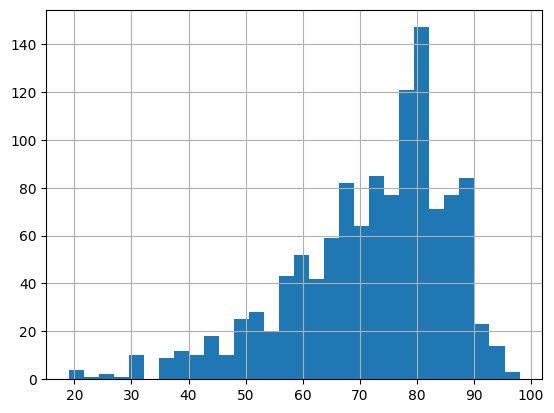

In [ ]:
df_sports.Critic_Score.hist(bins=30)

<Axes: >

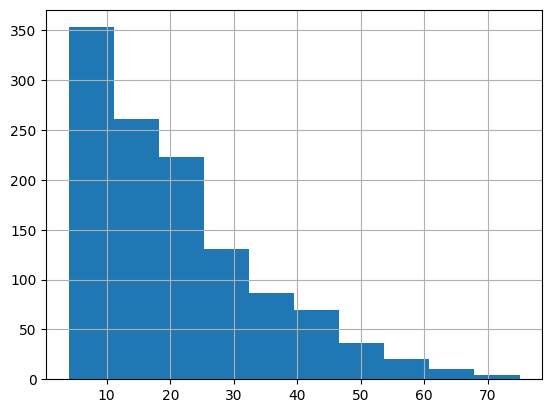

In [ ]:
df_sports.Critic_Count.hist(bins=10)

По графикам видно, что критикам нравятся спортивные игры. Очень много критиков ставят балл окол 80. У большинства игр количество критиков не большое - порядка 10.

Критикам нравятся больше игры на PC или на PS4?

In [ ]:
df.head(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E


In [ ]:
df_pc = df[df['Platform'] =='PC']
df_ps4 = df[df['Platform'] =='PS4']
df_ps4.head(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'Critic_Score'}>]], dtype=object)

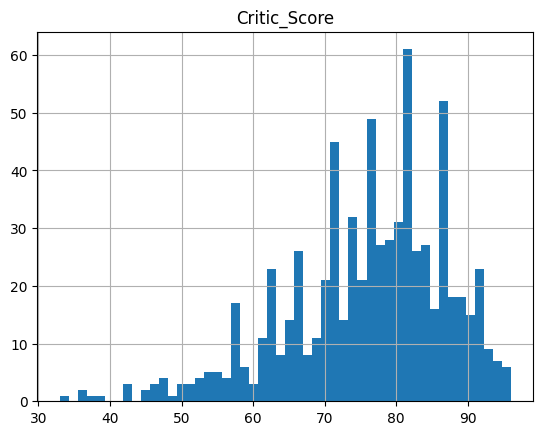

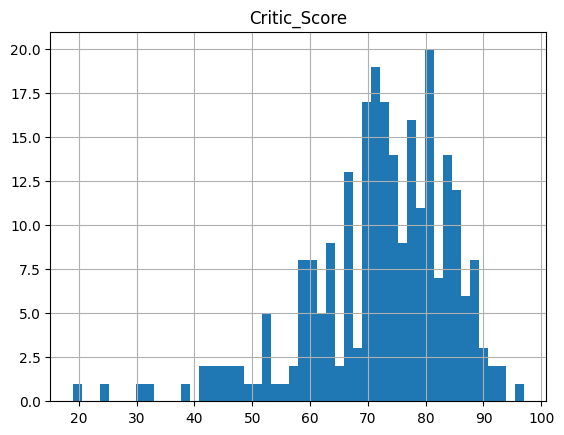

In [ ]:
df_pc.hist('Critic_Score',bins=50)
df_ps4.hist('Critic_Score',bins=50)

In [ ]:
# задание уровня значимости. считаем что  рейтинги не отличаются
alpha = 0.05
# Подключение библиотек статистических критериев
from scipy.stats import ttest_ind
# Проведение критерия Уэлча. Проверка того,что уровень оценок не отичается альфа= 5%
# параметр nan_policy= 'omit' игнорирует пропуски.
#Для включения критерия Уэлча необходимо ввести параметр equal_var= False
result =ttest_ind(df_pc.Critic_Score,df_ps4.Critic_Score, nan_policy= 'omit', equal_var= False)
print ('p-value: %8f ' % result.pvalue)
print ('statistics %4f ' % result.statistic)

if ( result.pvalue<alpha):
  print('Отвергаем нулевую гипотезу. Величины разные.')
else:
  print('Принимаем нулевую гипотезы')

p-value: 0.000021 
statistics 4.308759 
Отвергаем нулевую гипотезу. Величины разные.


Вывод: Уровень оценок на PC отличается от уровня оценок на ps4.

Критикам больше нравятся стрелялки или стратегии?

In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_str =df[df.Genre == 'Strategy']
df_shoot =df[df.Genre == 'Shooter']
df_shoot.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.04,4.24,0.13,1.32,14.73,88.0,81.0,3.4,8713.0,"Infinity Ward, Sledgehammer Games",M
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN,NaN,NaN,NaN
32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.70,3.68,0.11,1.13,14.61,87.0,89.0,6.3,1454.0,Treyarch,M
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.73,0.65,2.42,13.79,83.0,21.0,5.3,922.0,Treyarch,M


array([[<Axes: title={'center': 'Critic_Score'}>]], dtype=object)

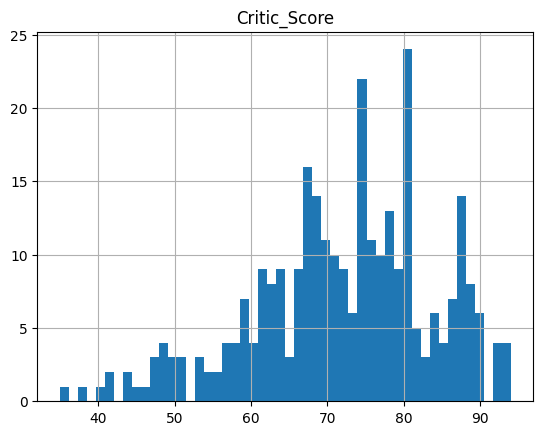

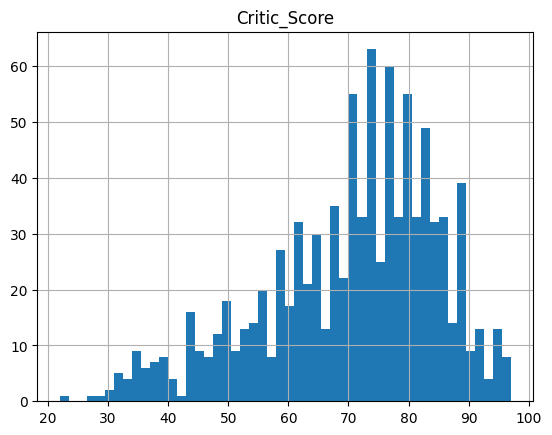

In [ ]:
df_str.hist('Critic_Score',bins=50)
df_shoot.hist('Critic_Score',bins=50)

In [ ]:
# Замена  NAN на средние
df_str.Critic_Score = df_str.Critic_Score.fillna(df_str.Critic_Score.mean())
df_shoot.Critic_Score = df_shoot.Critic_Score.fillna(df_shoot.Critic_Score.mean())

<ipython-input-12-62933eb8d949>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_str.Critic_Score = df_str.Critic_Score.fillna(df_str.Critic_Score.mean())
<ipython-input-12-62933eb8d949>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shoot.Critic_Score = df_shoot.Critic_Score.fillna(df_shoot.Critic_Score.mean())


In [ ]:
# задание уровня значимости. считаем что  рейтинги не отличаются
alpha = 0.05
# Проведение Т-теста (t-критерий тьюдента) Проверка того,что уровень оценок не отличается альфа= 5%
result =ttest_ind(df_str.Critic_Score,df_shoot.Critic_Score)
print ('p-value: %8f' % result.pvalue)

if ( result.pvalue<alpha):
  print('Отвергаем нулевую гипотезу')
else:
  print('Принимаем нулевую гипотезы')

p-value: 0.000239
Отвергаем нулевую гипотезу


Значения сильно отличаются. У шутеров поклонников больше.